# Porto GIS Analysis

In [13]:
%matplotlib inline
import os
import mapclassify
import pandas as pd
from IPython.display import IFrame
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
#from pysal.contrib.viz import mapping as maps
import palettable as pltt
from seaborn import palplot

from mapboxgl.utils import create_color_stops, df_to_geojson
from mapboxgl.viz import CircleViz

## Reading in Porto Data
### Load shapefiles


In [57]:
# Waste route data
Porto_Waste_collection_routes = '/Users/clast/OneDrive - Future Cities Catapult/SyncroniCity/Porto/Porto GIS/All_central_roads_with_additional_select.shp'
Porto_Waste_collection_routes = gpd.read_file(Porto_Waste_collection_routes)


In [25]:
# Info data
Porto_Waste_collection_routes.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 69 columns):
mvt_id        156 non-null object
name_mt       0 non-null object
name_pt       0 non-null object
name_az       0 non-null object
name_ka       0 non-null object
name_rm       0 non-null object
name_ko       0 non-null object
name_kn       0 non-null object
name_ar       0 non-null object
name_cs       0 non-null object
name_de       156 non-null object
name_ro       0 non-null object
name_it       0 non-null object
name_int      156 non-null object
name_ru       0 non-null object
name_pl       0 non-null object
name_ca       0 non-null object
name_lv       0 non-null object
name_bg       0 non-null object
name_cy       0 non-null object
name_fi       0 non-null object
name_he       0 non-null object
name_da       0 non-null object
name_de_1     0 non-null object
name_tr       0 non-null object
name_fr       0 non-null object
name_mk       0 non-null object
name_nonla    0 n

In [58]:
Porto_Waste_collection_routes_sample = Porto_Waste_collection_routes.drop(columns=['name_mt', 'name_pt','name_az', 'name_ka', 
                                                                           'name_rm', 'name_ko', 'name_kn', 'name_ar',
                                                                           'name_cs', 'name_ro', 'name_it', 'name_ru',
                                                                           'name_pl', 'name_ca', 'name_lv', 'name_bg',
                                                                           'name_cy', 'name_fi','name_he', 'name_da', 
                                                                           'name_de_1', 'name_tr', 'name_fr', 'name_mk',
                                                                           'name_nonla', 'name_fy', 'name_be', 'name_zh',
                                                                           'name_sr', 'name_sl', 'name_nl', 'name_ja',
                                                                           'name_lt', 'name_no', 'name_kk', 'name_ko_rm',
                                                                           'name_ja_rm', 'name_br', 'name_bs', 'name_lb',
                                                                           'name_la', 'name_sk', 'name_uk', 'name_hy',
                                                                           'name_sv', 'name_hu', 'name_hr', 'name_sq',
                                                                           'name_el', 'name_ga', 'name_en_1', 'name_gd',
                                                                           'name_ja_ka', 'name_is', 'name_th', 'name_sr-La', 
                                                                           'name_et', 'name_es'])
Porto_Waste_collection_routes_sample.head()

,mvt_id,name_de,name_int,name_en,class,network,name,ref,ref_length,name_latin,geometry
0,78.0,Largo de São Domingos,Largo de São Domingos,Largo de São Domingos,minor,None,Largo de São Domingos,None,NULL,Largo de São Domingos,LINESTRING (-958975.9710444056 5033511.4802140...
1,167.0,Rua Doutor Barbosa de Castro,Rua Doutor Barbosa de Castro,Rua Doutor Barbosa de Castro,minor,None,Rua Doutor Barbosa de Castro,None,NULL,Rua Doutor Barbosa de Castro,LINESTRING (-959276.344678995 5033745.56861319...
2,153.0,Largo Soares dos Reis,Largo Soares dos Reis,Largo Soares dos Reis,minor,None,Largo Soares dos Reis,None,NULL,Largo Soares dos Reis,LINESTRING (-956930.6833734919 5033903.2199840...
3,227.0,Rua Joaquim António de Aguiar,Rua Joaquim António de Aguiar,Rua Joaquim António de Aguiar,minor,None,Rua Joaquim António de Aguiar,None,NULL,Rua Joaquim António de Aguiar,LINESTRING (-956959.7085066283 5033836.9347485...
4,231.0,Rua Joaquim António de Aguiar,Rua Joaquim António de Aguiar,Rua Joaquim António de Aguiar,minor,None,Rua Joaquim António de Aguiar,None,NULL,Rua Joaquim António de Aguiar,LINESTRING (-957258.5265651213 5033666.1457634...


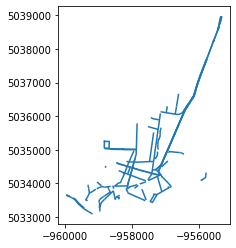

In [59]:
Porto_Waste_collection_routes_sample.plot()


In [63]:
#Landuse data
Central_landuse = '/Users/clast/OneDrive - Future Cities Catapult/SyncroniCity/Porto/Porto GIS/Centrico Historico/Central_landuse.shp'
Central_buildings = '/Users/clast/OneDrive - Future Cities Catapult/SyncroniCity/Porto/Porto GIS/Centrico Historico/Central_buildings_porto.shp'

Central_landuse = gpd.read_file(Central_landuse)
Central_buildings = gpd.read_file(Central_buildings)


In [72]:
Central_buildings.info()
Central_buildings.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 4 columns):
mvt_id        8030 non-null float64
render_min    8030 non-null float64
render_hei    8030 non-null float64
geometry      8030 non-null object
dtypes: float64(3), object(1)
memory usage: 251.0+ KB


,mvt_id,render_min,render_hei,geometry
0,1.0,0.0,4.0,POLYGON ((-957987.6641552477 5039541.047984349...
1,1.0,0.0,4.0,POLYGON ((-958948.5014873656 5036399.366688971...
2,1.0,2.0,3.0,POLYGON ((-956883.5073950971 5038580.807816517...
3,1.0,0.0,4.0,POLYGON ((-954577.2589323072 5036754.082273358...
4,1.0,0.0,4.0,"POLYGON ((-953602.6868216695 5036380.2574319, ..."


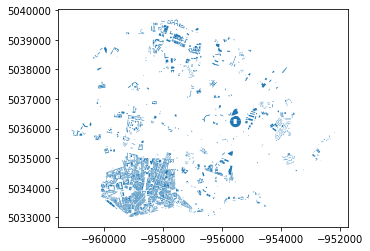

In [70]:
Central_buildings.plot()

In [73]:
Central_landuse.info()
Central_landuse.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 4 columns):
mvt_id      1002 non-null float64
class       1002 non-null object
subclass    1002 non-null object
geometry    1002 non-null object
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


,mvt_id,class,subclass,geometry
0,1.0,grass,park,POLYGON ((-956447.5774681582 5036402.949674672...
1,1.0,grass,park,"POLYGON ((-956357.4056613549 5036352.78787486,..."
2,1.0,grass,meadow,POLYGON ((-959476.9918782435 5034433.501867762...
3,1.0,grass,park,(POLYGON ((-957127.1504227561 5035818.92300543...
4,1.0,grass,grass,POLYGON ((-955684.4015138753 5035405.685321264...


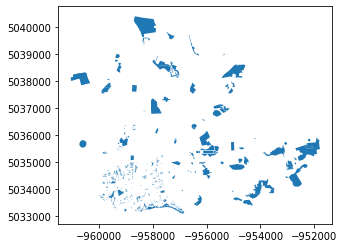

In [71]:
Central_landuse.plot()

In [62]:
# Transportation route data
Central_transport_polygon = '/Users/clast/OneDrive - Future Cities Catapult/SyncroniCity/Porto/Porto GIS/Centrico Historico/Central_transport_polygon.shp'
Central_transportation = '/Users/clast/OneDrive - Future Cities Catapult/SyncroniCity/Porto/Porto GIS/Centrico Historico/Central_transportation.shp'

Central_transport_polygon = gpd.read_file(Central_transport_polygon)
Central_transportation = gpd.read_file(Central_transportation)

In [67]:
Central_transport_polygon.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 7 columns):
mvt_id      1300 non-null float64
brunnel     0 non-null object
ramp        1300 non-null float64
class       1300 non-null object
service     0 non-null object
oneway      1300 non-null float64
geometry    1300 non-null object
dtypes: float64(3), object(4)
memory usage: 71.2+ KB


In [69]:
#Data cleaning
Central_transport_polygon_sample = Central_transport_polygon.drop(columns=['brunnel', 'service'])

In [74]:
Central_transport_polygon_sample.head()

,mvt_id,ramp,class,oneway,geometry
0,9.0,0.0,path,0.0,POLYGON ((-959115.1103224559 5036296.654432213...
1,115.0,0.0,path,0.0,POLYGON ((-957078.7801157944 5036418.475946043...
2,138.0,0.0,path,0.0,POLYGON ((-955776.3648135309 5037183.443393178...
3,140.0,0.0,path,0.0,POLYGON ((-958963.4305944525 5033352.634514667...
4,142.0,0.0,path,0.0,POLYGON ((-959064.9485226438 5033009.265051668...


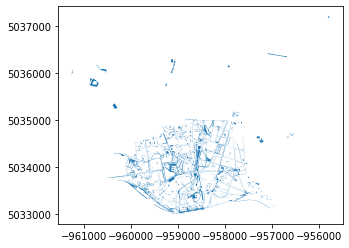

In [75]:
Central_transport_polygon_sample.plot()

In [76]:
Central_transportation.info()
Central_transportation.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6331 entries, 0 to 6330
Data columns (total 7 columns):
mvt_id      6331 non-null float64
brunnel     379 non-null object
ramp        6331 non-null float64
class       6331 non-null object
service     762 non-null object
oneway      6331 non-null float64
geometry    6331 non-null object
dtypes: float64(3), object(4)
memory usage: 346.3+ KB


,mvt_id,brunnel,ramp,class,service,oneway,geometry
0,1.0,tunnel,0.0,path,None,0.0,LINESTRING (-954216.5717050865 5038810.7160656...
1,1.0,tunnel,0.0,minor,None,0.0,LINESTRING (-959873.5089624729 5038520.4942238...
2,1.0,tunnel,0.0,path,None,0.0,LINESTRING (-957853.8993557487 5037606.8328701...
3,1.0,tunnel,0.0,service,None,1.0,LINESTRING (-956211.1004119029 5036523.5768599...
4,1.0,tunnel,0.0,secondary,None,1.0,LINESTRING (-958826.0828092525 5034227.6178221...


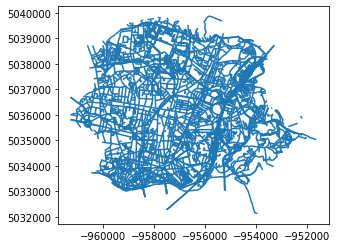

In [77]:
Central_transportation.plot()

In [81]:
# Water data
waterway_central = '/Users/clast/OneDrive - Future Cities Catapult/SyncroniCity/Porto/Porto GIS/Centrico Historico/waterway_central.shp'
water_central = '/Users/clast/OneDrive - Future Cities Catapult/SyncroniCity/Porto/Porto GIS/Centrico Historico/water_central.shp'

waterway_central = gpd.read_file(waterway_central)
water_central = gpd.read_file(water_central)

In [82]:
waterway_central.info()
waterway_central.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 66 columns):
mvt_id        315 non-null float64
name_mt       0 non-null object
name_pt       17 non-null object
name_az       0 non-null object
name_ka       0 non-null object
name_rm       0 non-null object
name_ko       0 non-null object
name_kn       0 non-null object
name_ar       0 non-null object
name_cs       0 non-null object
name_de       255 non-null object
name_ro       0 non-null object
name_it       0 non-null object
name_int      255 non-null object
name_ru       0 non-null object
name_pl       0 non-null object
name_ca       0 non-null object
name_lv       0 non-null object
name_bg       0 non-null object
name_cy       0 non-null object
name_fi       0 non-null object
name_he       0 non-null object
name_da       0 non-null object
name_de_1     0 non-null object
name_tr       0 non-null object
name_fr       17 non-null object
name_mk       0 non-null object
name_nonla    

,mvt_id,name_mt,name_pt,name_az,name_ka,name_rm,name_ko,name_kn,name_ar,name_cs,...,name,name_gd,name_ja_ka,name_is,name_th,name_latin,name_sr-La,name_et,name_es,geometry
0,1.0,None,None,None,None,None,None,None,None,None,...,Rio Leça,None,None,None,None,Rio Leça,None,None,None,LINESTRING (-963718.0526195037 5044582.0791868...
1,1.0,None,None,None,None,None,None,None,None,None,...,Rio Leça,None,None,None,None,Rio Leça,None,None,None,LINESTRING (-959785.272791621 5043620.87436907...
2,1.0,None,None,None,None,None,None,None,None,None,...,Rio Leça,None,None,None,None,Rio Leça,None,None,None,LINESTRING (-956380.0979041251 5043674.8452239...
3,1.0,None,None,None,None,None,None,None,None,None,...,Rio Leça,None,None,None,None,Rio Leça,None,None,None,(LINESTRING (-953934.1129990014 5045053.754352...
4,1.0,None,None,None,None,None,None,None,None,None,...,Ribeira da Boa Nova,None,None,None,None,Ribeira da Boa Nova,None,None,None,LINESTRING (-967920.2976823361 5043396.3405984...


In [85]:
#Data Cleaning
waterway_central_sample = waterway_central.drop(columns=['name_mt','name_az', 'name_ka', 
                                                                           'name_rm', 'name_ko', 'name_kn', 'name_ar',
                                                                           'name_cs', 'name_ro', 'name_it', 'name_ru',
                                                                           'name_pl', 'name_ca', 'name_lv', 'name_bg',
                                                                           'name_cy', 'name_fi','name_he', 'name_da', 
                                                                           'name_de_1', 'name_tr', 'name_fr', 'name_mk',
                                                                           'name_nonla', 'name_fy', 'name_be', 'name_zh',
                                                                           'name_sr', 'name_sl', 'name_nl', 'name_ja',
                                                                           'name_lt', 'name_no', 'name_kk', 'name_ko_rm',
                                                                           'name_ja_rm', 'name_br', 'name_bs', 'name_lb',
                                                                           'name_la', 'name_sk', 'name_uk', 'name_hy',
                                                                           'name_sv', 'name_hu', 'name_hr', 'name_sq',
                                                                           'name_el', 'name_ga', 'name_en_1', 'name_gd',
                                                                           'name_ja_ka', 'name_is', 'name_th', 'name_sr-La', 
                                                                           'name_et'])
waterway_central_sample.head()

,mvt_id,name_pt,name_de,name_int,name_en,class,name,name_latin,name_es,geometry
0,1.0,None,Rio Leça,Rio Leça,Rio Leça,river,Rio Leça,Rio Leça,None,LINESTRING (-963718.0526195037 5044582.0791868...
1,1.0,None,Rio Leça,Rio Leça,Rio Leça,river,Rio Leça,Rio Leça,None,LINESTRING (-959785.272791621 5043620.87436907...
2,1.0,None,Rio Leça,Rio Leça,Rio Leça,river,Rio Leça,Rio Leça,None,LINESTRING (-956380.0979041251 5043674.8452239...
3,1.0,None,Rio Leça,Rio Leça,Rio Leça,river,Rio Leça,Rio Leça,None,(LINESTRING (-953934.1129990014 5045053.754352...
4,1.0,None,Ribeira da Boa Nova,Ribeira da Boa Nova,Ribeira da Boa Nova,stream,Ribeira da Boa Nova,Ribeira da Boa Nova,None,LINESTRING (-967920.2976823361 5043396.3405984...


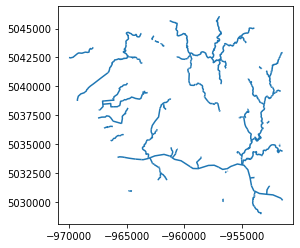

In [86]:
waterway_central_sample.plot()

In [87]:
water_central.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
mvt_id      190 non-null float64
class       190 non-null object
geometry    190 non-null object
dtypes: float64(1), object(2)
memory usage: 4.5+ KB


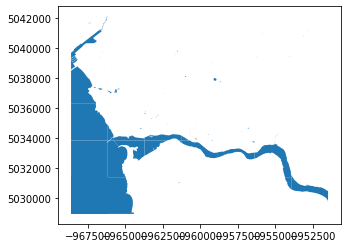

In [88]:
water_central.plot()

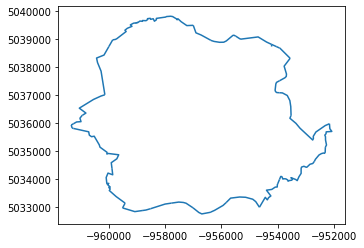

In [95]:
# Boundary data
Central_Border = '/Users/clast/OneDrive - Future Cities Catapult/SyncroniCity/Porto/Porto GIS/Centrico Historico/Central_Border.shp'
Central_Border = gpd.read_file(Central_Border)
Central_Border.plot()

## Producing a map

### Choosing a Color pallette

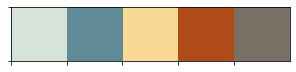

In [89]:
wes = pltt.wesanderson.Darjeeling2_5.hex_colors
palplot(wes)

In [90]:
wes

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

We will use these to style our map. For the sake of the example, let us use the following layers, available from the OS pack:

- water
- Waterway
- Buildings
- Transportation

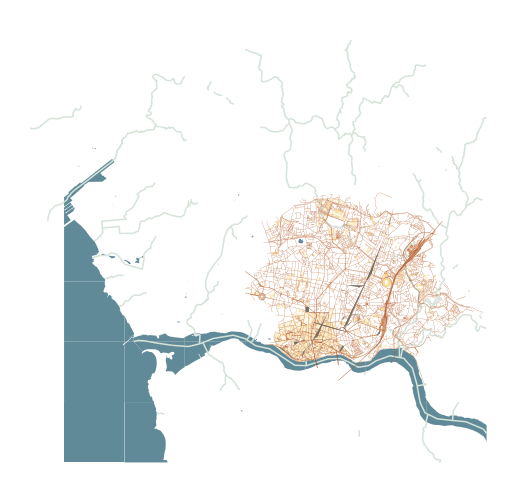

<Figure size 432x288 with 0 Axes>

In [94]:
# NOTE: this might take a little bit depending on the machine

# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Add water boundaries
waterway_central_sample.plot(ax=ax, color='#D5E3D8')
# Add waterways (remove boundary lines for the polygons)
water_central.plot(ax=ax, facecolor='#618A98', linewidth=0.)
# Add Buildings
Central_buildings.plot(ax=ax, facecolor='#F9DA95', edgecolor='#F9DA95', linewidth=0.)
# Add roads
Central_transportation.plot(ax=ax, color='#AE4B16', linewidth=0.2)
# Add waste collection routes 
Porto_Waste_collection_routes.plot(ax=ax, facecolor='#787064', linewidth=0.)
# Remove axes
ax.set_axis_off()
# Impose same size for units across axes
plt.axis('equal')
# Display
plt.show()
plt.savefig('porto_central_GIS.png')